![](images/obspy_logo_full_524x179px.png)

<div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , 0.9) ; line-height: 100%">Breve guida a ObsPy: gestione dei dati della forma d'onda</div>

Questa guida trae spunto dal Tutorial di:

* Lion Krischer ([@krischer](https://github.com/krischer))
* Tobias Megies ([@megies](https://github.com/megies))

Seismo-Live: http://seismo-live.org

---

In [1]:
%matplotlib inline
from __future__ import print_function
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 12, 8

<img src="images/Stream_Trace.svg" width=90%>

* la lettura dei dati delle forme d'onda restituisce un oggetto **`Stream`**.

In [2]:
from obspy import read
st = read("./data/waveform_PFO.mseed", format="mseed")
print(st)

2 Trace(s) in Stream:
II.PFO.00.BHZ | 2011-03-11T05:46:23.019500Z - 2011-03-11T06:36:22.969500Z | 20.0 Hz, 60000 samples
II.PFO.10.BHZ | 2011-03-11T05:46:23.019500Z - 2011-03-11T06:36:22.994500Z | 40.0 Hz, 120000 samples


- Il carattere `*` di UNIX può essere utilizzato per leggere più file contemporaneamente
- Rilevamento automatico del formato dei file, non è necessario preoccuparsi dei formati di file

   - formati attualmente supportati: **MiniSEED, SAC, SEG-Y, SEG-2, GSE1 / 2, Seisan, SH, DataMark, CSS, wav, y, Q, ASCII, Guralp Compressed Format, Kinemetrics EVT, K-NET e KiK, PDAS, Reftek 130, WIN (continua a crescere ...)**
   - sono inclusi nuovi formati ogni volta che viene fornita una routine di lettura di base (o, per esempio, documentazione sufficiente sulla compressione dei dati, ecc.)
   - È possibile aggiungere formati di file personalizzati specifici dell'utente (tramite plug-in) per essere rilevati automaticamente in un'installazione ObsPy locale

In [3]:
from obspy import read
st = read("./data/waveform_*")
print(st)

8 Trace(s) in Stream:
GR.BFO..BHE   | 2011-03-11T05:46:23.021088Z - 2011-03-11T06:36:22.971088Z | 20.0 Hz, 60000 samples
GR.BFO..BHN   | 2011-03-11T05:46:23.021088Z - 2011-03-11T06:36:22.971088Z | 20.0 Hz, 60000 samples
GR.BFO..BHZ   | 2011-03-11T05:46:23.021088Z - 2011-03-11T06:36:22.971088Z | 20.0 Hz, 60000 samples
II.PFO.00.BHZ | 2011-03-11T05:46:23.019500Z - 2011-03-11T06:36:22.969500Z | 20.0 Hz, 60000 samples
II.PFO.10.BHZ | 2011-03-11T05:46:23.019500Z - 2011-03-11T06:36:22.994500Z | 40.0 Hz, 120000 samples
SY.PFO.S3.MXE | 2011-03-11T05:47:31.587750Z - 2011-03-11T06:36:22.974250Z | 6.2 Hz, 18152 samples
SY.PFO.S3.MXN | 2011-03-11T05:47:31.587750Z - 2011-03-11T06:36:22.974250Z | 6.2 Hz, 18152 samples
SY.PFO.S3.MXZ | 2011-03-11T05:47:31.587750Z - 2011-03-11T06:36:22.974250Z | 6.2 Hz, 18152 samples


- per i file MiniSEED, è supportata solo la lettura di brevi parti di file senza che i file vengano letti e tenuti interamente in memoria (consente di risparmiare tempo e memoria quando si lavora su grandi raccolte di file di grandi dimensioni)

In [4]:
from obspy import UTCDateTime

t = UTCDateTime("2011-03-11T05:46:23.015400Z")
st = read("./data/waveform_*", starttime=t + 10 * 60, endtime=t + 12 * 60)
print(st)

8 Trace(s) in Stream:
GR.BFO..BHE   | 2011-03-11T05:56:23.021088Z - 2011-03-11T05:58:23.021088Z | 20.0 Hz, 2401 samples
GR.BFO..BHN   | 2011-03-11T05:56:23.021088Z - 2011-03-11T05:58:23.021088Z | 20.0 Hz, 2401 samples
GR.BFO..BHZ   | 2011-03-11T05:56:23.021088Z - 2011-03-11T05:58:23.021088Z | 20.0 Hz, 2401 samples
II.PFO.00.BHZ | 2011-03-11T05:56:23.019500Z - 2011-03-11T05:58:23.019500Z | 20.0 Hz, 2401 samples
II.PFO.10.BHZ | 2011-03-11T05:56:23.019500Z - 2011-03-11T05:58:23.019500Z | 40.0 Hz, 4801 samples
SY.PFO.S3.MXE | 2011-03-11T05:56:23.084250Z - 2011-03-11T05:58:23.078750Z | 6.2 Hz, 744 samples
SY.PFO.S3.MXN | 2011-03-11T05:56:23.084250Z - 2011-03-11T05:58:23.078750Z | 6.2 Hz, 744 samples
SY.PFO.S3.MXZ | 2011-03-11T05:56:23.084250Z - 2011-03-11T05:58:23.078750Z | 6.2 Hz, 744 samples


#### L'oggetto Stream

 - Un oggetto Stream è una collezione di oggetti Trace

In [5]:
from obspy import read
st = read("./data/waveform_PFO.mseed")
print(type(st))

<class 'obspy.core.stream.Stream'>


In [6]:
print(st)

2 Trace(s) in Stream:
II.PFO.00.BHZ | 2011-03-11T05:46:23.019500Z - 2011-03-11T06:36:22.969500Z | 20.0 Hz, 60000 samples
II.PFO.10.BHZ | 2011-03-11T05:46:23.019500Z - 2011-03-11T06:36:22.994500Z | 40.0 Hz, 120000 samples


In [7]:
print(st.traces)

[<obspy.core.trace.Trace object at 0x11a5bca20>, <obspy.core.trace.Trace object at 0x11a5bc080>]


In [8]:
print(st[0])

II.PFO.00.BHZ | 2011-03-11T05:46:23.019500Z - 2011-03-11T06:36:22.969500Z | 20.0 Hz, 60000 samples


- Più tracce possono essere assemblate usando l'operatore **`+`** (o usando i metodi `.append()` e `.extend()`)

In [9]:
st1 = read("./data/waveform_PFO.mseed")
st2 = read("./data/waveform_PFO_synthetics.mseed")

st = st1 + st2
print(st)

st3 = read("./data/waveform_BFO_BHE.sac")

st += st3
print(st)

5 Trace(s) in Stream:
II.PFO.00.BHZ | 2011-03-11T05:46:23.019500Z - 2011-03-11T06:36:22.969500Z | 20.0 Hz, 60000 samples
II.PFO.10.BHZ | 2011-03-11T05:46:23.019500Z - 2011-03-11T06:36:22.994500Z | 40.0 Hz, 120000 samples
SY.PFO.S3.MXE | 2011-03-11T05:47:31.587750Z - 2011-03-11T06:36:22.974250Z | 6.2 Hz, 18152 samples
SY.PFO.S3.MXN | 2011-03-11T05:47:31.587750Z - 2011-03-11T06:36:22.974250Z | 6.2 Hz, 18152 samples
SY.PFO.S3.MXZ | 2011-03-11T05:47:31.587750Z - 2011-03-11T06:36:22.974250Z | 6.2 Hz, 18152 samples
6 Trace(s) in Stream:
II.PFO.00.BHZ | 2011-03-11T05:46:23.019500Z - 2011-03-11T06:36:22.969500Z | 20.0 Hz, 60000 samples
II.PFO.10.BHZ | 2011-03-11T05:46:23.019500Z - 2011-03-11T06:36:22.994500Z | 40.0 Hz, 120000 samples
SY.PFO.S3.MXE | 2011-03-11T05:47:31.587750Z - 2011-03-11T06:36:22.974250Z | 6.2 Hz, 18152 samples
SY.PFO.S3.MXN | 2011-03-11T05:47:31.587750Z - 2011-03-11T06:36:22.974250Z | 6.2 Hz, 18152 samples
SY.PFO.S3.MXZ | 2011-03-11T05:47:31.587750Z - 2011-03-11T06:36:22.97

 - loop  su tracce comodo (e ben leggibile)

In [10]:
for tr in st:
    print(tr.id)

II.PFO.00.BHZ
II.PFO.10.BHZ
SY.PFO.S3.MXE
SY.PFO.S3.MXN
SY.PFO.S3.MXZ
GR.BFO..BHE


 - Lo stream è utile per applicare la stessa elaborazione a un grande maggiore di forme d'onda diverse o per raggruppare tracce per l'elaborazione (ad esempio tre componenti di una stazione in uno stream)

#### L'oggetto Trace (traccia)

- un oggetto Trace è un blocco singolo contiguo di dati di forme d'onda (cioè serie temporali a intervalli regolari, senza spazi vuoti)
- un oggetto Trace contiene una quantità limitata di metadati in un oggetto simile al dizionario (come **`Trace.stats`**) che descrive completamente le serie temporali specificando..
   * posizione / strumento di registrazione (rete, stazione, posizione e codice canale)
   * ora di inizio
   * frequenza di campionamento

In [11]:
st = read("./data/waveform_PFO.mseed")
tr = st[0]  # get the first Trace in the Stream
print(tr)

II.PFO.00.BHZ | 2011-03-11T05:46:23.019500Z - 2011-03-11T06:36:22.969500Z | 20.0 Hz, 60000 samples


In [12]:
print(tr.stats)

         network: II
         station: PFO
        location: 00
         channel: BHZ
       starttime: 2011-03-11T05:46:23.019500Z
         endtime: 2011-03-11T06:36:22.969500Z
   sampling_rate: 20.0
           delta: 0.05
            npts: 60000
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'M', 'number_of_records': 32, 'encoding': 'STEIM1', 'byteorder': '>', 'record_length': 4096, 'filesize': 356352})


- Per le applicazioni personalizzate a volte è necessario manipolare direttamente i metadati di una Traccia.
- I metadati della Traccia rimarranno **coerenti**, poiché tutti i valori sono derivati dall'orario di inizio, i dati e la frequenza di campionamento e sono **aggiornati automaticamente**

In [13]:
print(tr.stats.delta, "|", tr.stats.endtime)

0.05 | 2011-03-11T06:36:22.969500Z


In [14]:
tr.stats.sampling_rate = 5.0
print(tr.stats.delta, "|", tr.stats.endtime)

0.2 | 2011-03-11T09:06:22.819500Z


In [15]:
print(tr.stats.npts)

60000


In [16]:
tr.data = tr.data[:100]
print(tr.stats.npts, "|", tr.stats.endtime)

100 | 2011-03-11T05:46:42.819500Z


- Alcuni metodi rendono semplici le manipolazioni di base

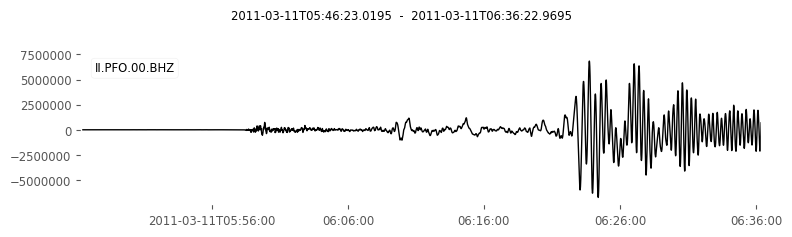

In [17]:
tr = read("./data/waveform_PFO.mseed")[0]
tr.plot()

In [18]:
print(tr)
tr.resample(sampling_rate=100.0)
print(tr)

II.PFO.00.BHZ | 2011-03-11T05:46:23.019500Z - 2011-03-11T06:36:22.969500Z | 20.0 Hz, 60000 samples
II.PFO.00.BHZ | 2011-03-11T05:46:23.019500Z - 2011-03-11T06:36:23.009500Z | 100.0 Hz, 300000 samples


II.PFO.00.BHZ | 2011-03-11T05:46:23.019500Z - 2011-03-11T06:36:23.009500Z | 100.0 Hz, 300000 samples
II.PFO.00.BHZ | 2011-03-11T05:58:23.019500Z - 2011-03-11T06:00:23.019500Z | 100.0 Hz, 12001 samples


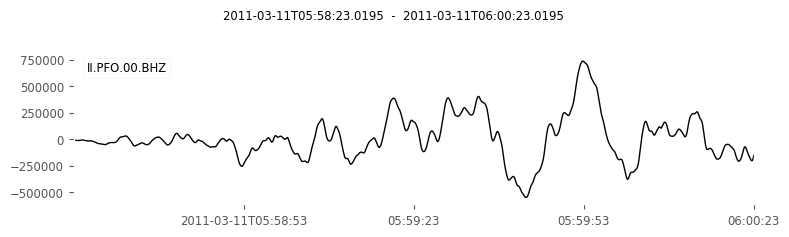

In [19]:
print(tr)
tr.trim(tr.stats.starttime + 12 * 60, tr.stats.starttime + 14 * 60)
print(tr)
tr.plot()

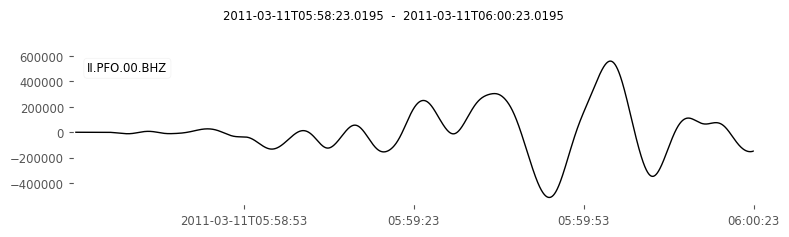

In [20]:
tr.detrend("linear")
tr.taper(max_percentage=0.05, type='cosine')
tr.filter("lowpass", freq=0.1)
tr.plot()

In [21]:
# try tr.<Tab> for other methods defined for Trace
tr.detrend?

- Dati grezzi sono disponibili come [**`numpy.ndarray`**](http://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.html) (come **`Trace.data`**)

In [22]:
print(tr.data[:20])

[  0.00000000e+00   1.14214131e-11   1.36532184e-10   8.27107696e-10
   3.42897869e-09   1.10577664e-08   2.98034791e-08   7.02499050e-08
   1.49294808e-07   2.92257039e-07   5.35256796e-07   9.27855448e-07
   1.53594149e-06   2.44484947e-06   3.76269890e-06   5.62394072e-06
   8.19309900e-06   1.16686963e-05   1.62873519e-05   2.23280418e-05]


- I dati possono essere modificati direttamente per esempio...

...facendo operazioni aritmetiche (veloce, gestito in C da NumPy)

In [24]:
print(tr.data ** 2 + 0.5)

[5.00000000e-01 5.00000000e-01 5.00000000e-01 ... 2.19703659e+10
 2.19251720e+10 2.18793418e+10]


...usando [**`numpy.ndarray`** metodo predefinito](http://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.html) (sempre gestito in C da NumPy)

In [26]:
print(tr.data.max())
print(tr.data.mean())
print(tr.data.ptp())
# try tr.data.<Tab> per una lista di metodi numpy definiti su ndarray

560511.6159428622
6903.562377833056
1074087.2552761228


...usando le funzioni **`numpy`** (sempre gestito in C da NumPy)

In [28]:
import numpy as np
print(np.abs(tr.data))
# puoi provare np.<Tab> ma qui c'è molto
# try np.a<Tab>

[0.00000000e+00 1.14214131e-11 1.36532184e-10 ... 1.48224039e+05
 1.48071510e+05 1.47916672e+05]


...inserendo puntatori a routine esistenti C/Fortran dall'interno di Python!

Questo viene fatto internamente in diversi posti, ad es. per correlazioni incrociate, beamforming o in librerie di tipi di file di terze parti come ad es. libmseed.

- Gli oggetti traccia possono anche essere generati manualmente con i dati in un [**`numpy.ndarray`**] (http://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.html) (ad es. quando è necessario analizzare le forme d'onda da file ascii non standard)

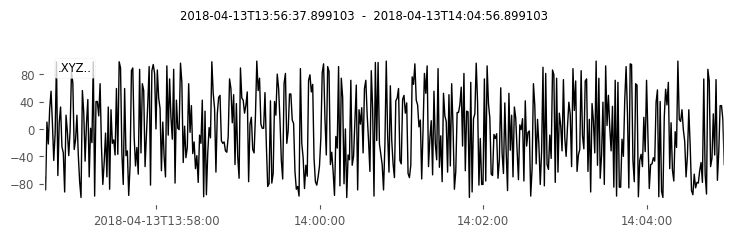

In [29]:
from obspy import Trace

x = np.random.randint(-100, 100, 500)
tr = Trace(data=x)
tr.stats.station = "XYZ"
tr.stats.starttime = UTCDateTime()

tr.plot()

- Ogetti Stream possono essere assemblati da Tracce generate manualmente.

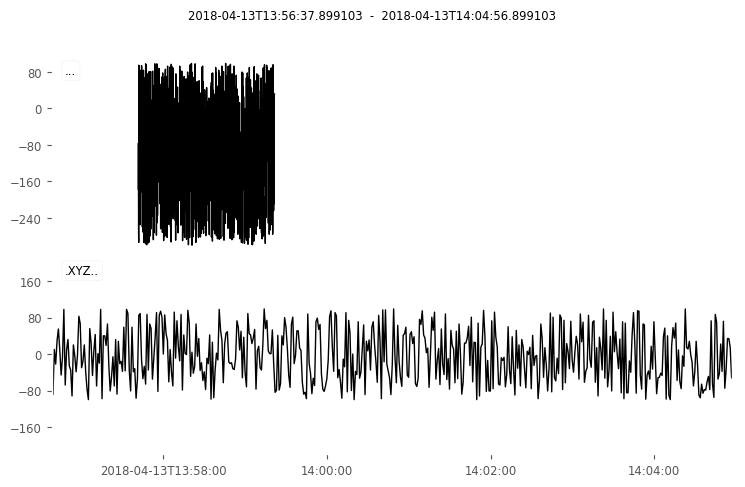

In [30]:
from obspy import Stream

tr2 = Trace(data=np.random.randint(-300, 100, 1000))
tr2.stats.starttime = UTCDateTime()
tr2.stats.sampling_rate = 10.0
st = Stream([tr, tr2])

st.plot()

#### Metodi pre-definiti in  **`Stream`** / **`Trace`**

- La maggior parte dei metodi che funziona su un oggetto Trace funziona anche per un oggetto Stream. Sono semplicemente eseguiti su ciascuna traccia. [Vedere la ducumentazione ObsPy per una panoramica dei metodi disponibili](http://docs.obspy.org/packages/autogen/obspy.core.stream.Stream.html) (oppure prova **`st.<Tab>`**).
 - **`st.filter()`** - Filtra tutte le tracce allegate.
 - **`st.trim()`** - taglia tutte le tracce.
 - **`st.resample()`** / **`st.decimate()`** - Cambia il passo di campionamento.
 - **`st.trigger()`** - Avvia un algoritmo di trigger.
 - **`st.plot()`** / **`st.spectrogram()`** - Visualizza i dati.
 - **`st.attach_response()`**/**`st.remove_response()`**, **`st.simulate()`** - Correzione per lo strumento
 - **`st.merge()`**, **`st.normalize()`**, **`st.detrend()`**, **`st.taper()`**, ...
- Un oggetto **`Stream`** può essere anche esportato in molti formati, quindi ObsPy può essere per converire tra diversi formati di file.

In [31]:
st = read("./data/waveform_*.sac")
st.write("output_file.mseed", format="MSEED")
!ls -l output_file*

-rw-r--r--  1 spina  staff  737280 Apr 13 16:04 output_file.mseed


<img src="images/Stream_Trace.svg" width=90%>

#### Esercizi con le Trace
 - Crea un **`numpy.ndarray`** con tutti zero (ad esempio usa **`numpy.zeros()`**) e metti un impulso ideale da qualche parte in esso
  - Inizializza un oggetto **`Trace`** con il tuo array di dati
  - Inserisci alcune informazioni sulla stazione (ad es. Rete, stazione, ..)
  - Stampa il riepilogo della traccia e fai un plot la traccia
  - Modifica la frequenza di campionamento a 20 Hz
  - Modifica l'ora di inizio della traccia all'ora di inizio di questa sessione
  - Stampa il riepilogo traccia e fai di nuovo un plot la traccia

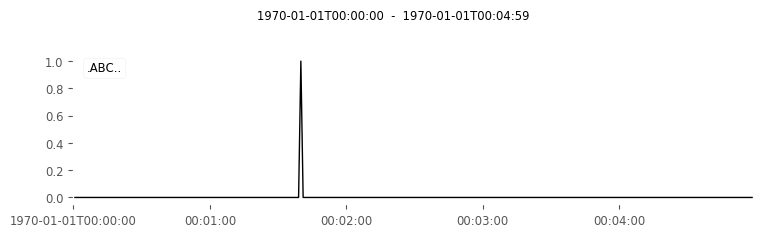

.ABC.. | 2018-04-13T15:00:00.000000Z - 2018-04-13T15:00:14.950000Z | 20.0 Hz, 300 samples


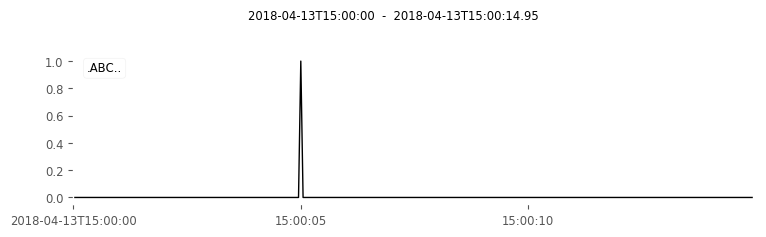

In [34]:
x = np.zeros(300)
x[100] = 1.0
tr = Trace(data=x)
tr.stats.station = "ABC"
tr.plot()
tr.stats.sampling_rate = 20.0
tr.stats.starttime = UTCDateTime(2018, 4, 13, 15, 0, 0)
print(tr)
tr.plot()

- Usa **`tr.filter(...)`** e applica un filtro passa-basso con una frequanza d'angolo di 1 Hertz.
- Visualizza il grafico di anteprima, ci sono alcuni secondi di zeri che possiamo tagliare.

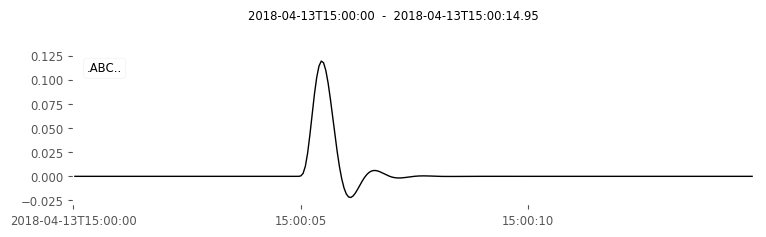

In [35]:
tr.filter("lowpass", freq=1)
tr.plot()

- Usa **`tr.trim(...)`** per rimuovere alcuni degli zero all'inizio ed alla fine
- visualizza di nuovo il grafico

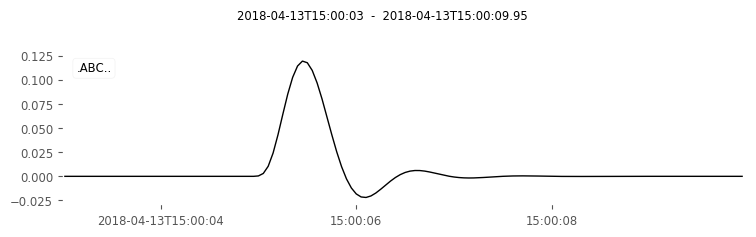

In [36]:
tr.trim(tr.stats.starttime + 3, tr.stats.endtime - 5)
tr.plot()

- Scala le ampiezze della traccia di un fattore 500
- Aggiungi rumore standard gaussiano alla traccia (usa [**`np.random.randn()`**](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randn.html))
- Visualizza di nuovo la traccia

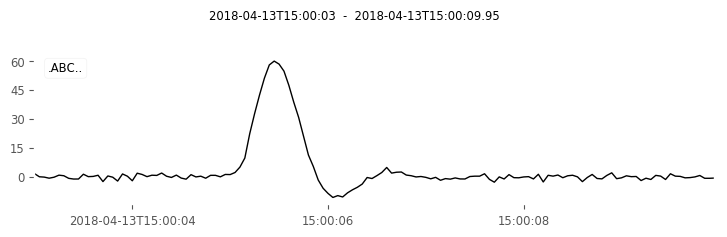

In [37]:
tr.data = tr.data * 500
tr.data = tr.data + np.random.randn(len(tr))
tr.plot()

#### Esercizi con gli Stream

- Leggi tutti i dati di terremoto di Tohoku in un oggetto Stream ("./data/waveform\_\*")
- Stampa il riepilogo del flusso

In [38]:
st = read("./data/waveform_*")
print(st)

8 Trace(s) in Stream:
GR.BFO..BHE   | 2011-03-11T05:46:23.021088Z - 2011-03-11T06:36:22.971088Z | 20.0 Hz, 60000 samples
GR.BFO..BHN   | 2011-03-11T05:46:23.021088Z - 2011-03-11T06:36:22.971088Z | 20.0 Hz, 60000 samples
GR.BFO..BHZ   | 2011-03-11T05:46:23.021088Z - 2011-03-11T06:36:22.971088Z | 20.0 Hz, 60000 samples
II.PFO.00.BHZ | 2011-03-11T05:46:23.019500Z - 2011-03-11T06:36:22.969500Z | 20.0 Hz, 60000 samples
II.PFO.10.BHZ | 2011-03-11T05:46:23.019500Z - 2011-03-11T06:36:22.994500Z | 40.0 Hz, 120000 samples
SY.PFO.S3.MXE | 2011-03-11T05:47:31.587750Z - 2011-03-11T06:36:22.974250Z | 6.2 Hz, 18152 samples
SY.PFO.S3.MXN | 2011-03-11T05:47:31.587750Z - 2011-03-11T06:36:22.974250Z | 6.2 Hz, 18152 samples
SY.PFO.S3.MXZ | 2011-03-11T05:47:31.587750Z - 2011-03-11T06:36:22.974250Z | 6.2 Hz, 18152 samples


- Usa **`st.select()`** per tenere solo le tracce della stazione BFO nello stream. 
- Visualizza le tracce

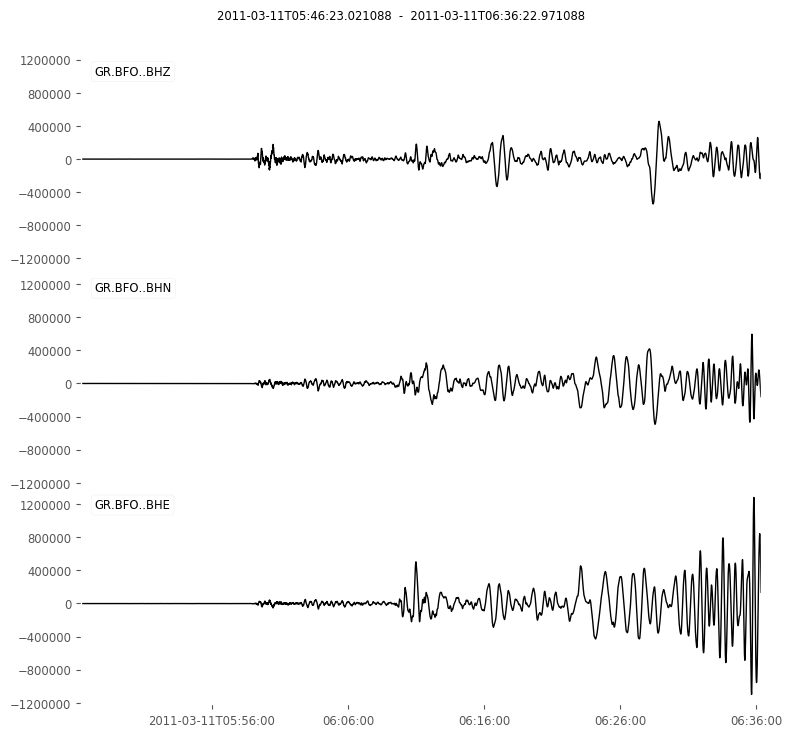

In [39]:
st = st.select(station="BFO")
st.plot()

- trim the data to a 10 minute time window around the first arrival (just roughly looking at the preview plot)
- display the preview plot and spectrograms for the stream (with logarithmic frequency scale, use `wlen=50` for the spectrogram plot)

- Taglia i dati in una finestra temporale di 10 minuti intorno al primo arrivo (guardando solo approssimativamente la figura precedente)
- visualizza le tracce e gli spettrogrammi per lo stream (con scala di frequenza logaritmica, usa `wlen=50` per il grafico dello spettrogramma)

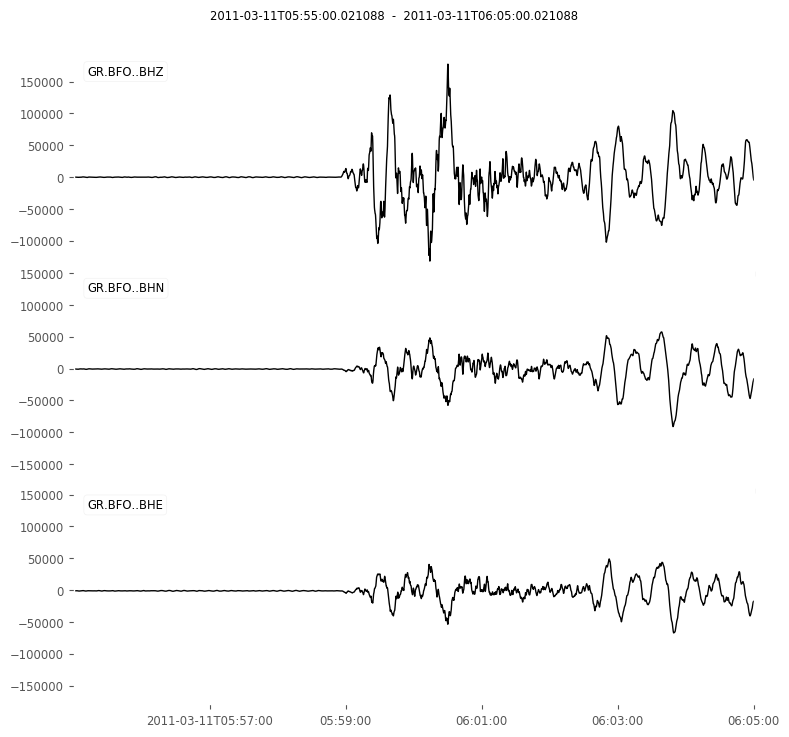

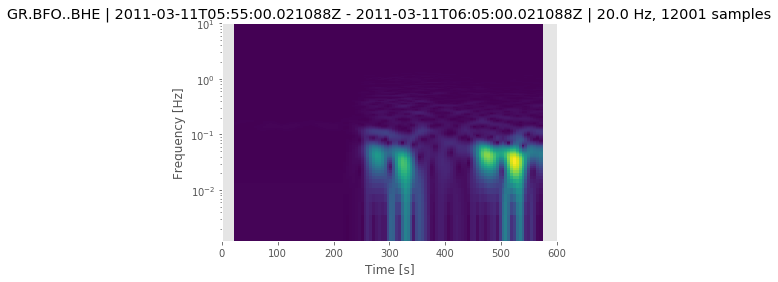

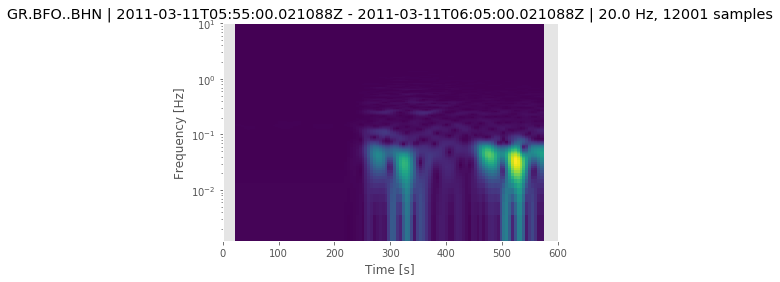

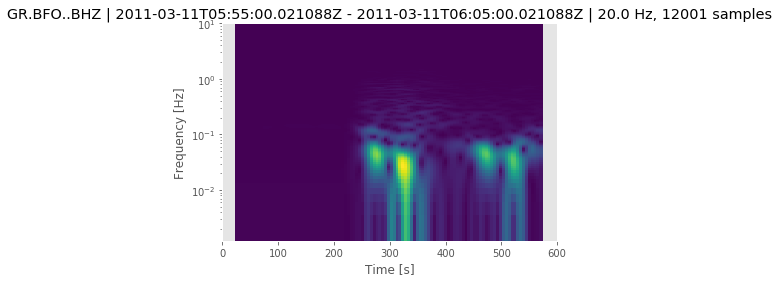

In [40]:
t1 = UTCDateTime(2011, 3, 11, 5, 55)
st.trim(t1, t1 + 10 * 60)
st.plot()
st.spectrogram(log=True, wlen=50);

- rimuovi l'andamento lineare dai dati, applica un tapering e un filtro passa-basso a 0,1 Hertz
- mostra di nuovo il grafico

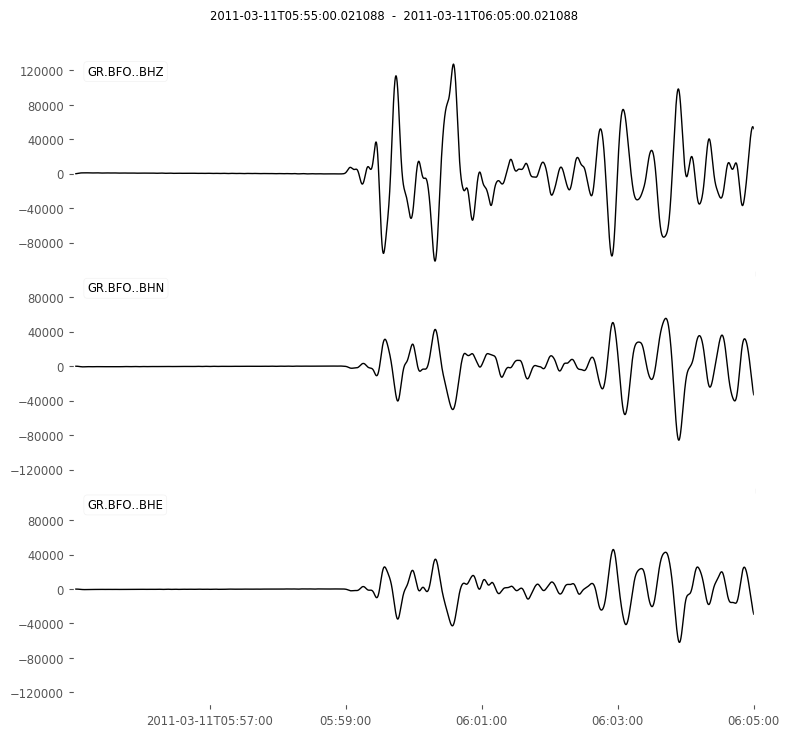

In [41]:
st.detrend("linear")
st.filter("lowpass", freq=0.1)
st.plot()